# Sales Data Analysis

Description: Analyze a sales dataset and create visual reports
showing monthly sales trends, best-selling products, and
customer insights.
    
Challenges:
Handle missing & inconsistent data
Group by region/category for insights
Create 3–5 meaningful visualizations

Tech Stack: Python, Pandas, Matplotlib, Seaborn, Jupyter
Notebook

# 1.Import Libraries 

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Load Dataset

In [42]:
data = pd.read_csv("sales_data.csv")
data.head()

,Order_Date,Region,Category,Product,Customer_ID,Quantity,Sales
0,2024-04-12,East,Electronics,Product A,1064,4.0,3010.728220
1,2024-06-28,West,Electronics,Product A,1021,7.0,114.664056
2,2024-04-02,North,Clothing,Product B,1089,6.0,1610.540021
3,2024-01-15,North,Electronics,Product B,1081,2.0,3182.453255
4,2024-04-16,West,Clothing,Product D,1049,5.0,744.998681


3.Check Missing Value

In [43]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order_Date   500 non-null    object 
 1   Region       500 non-null    object 
 2   Category     500 non-null    object 
 3   Product      500 non-null    object 
 4   Customer_ID  500 non-null    int64  
 5   Quantity     485 non-null    float64
 6   Sales        480 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 27.5+ KB


Order_Date      0
Region          0
Category        0
Product         0
Customer_ID     0
Quantity       15
Sales          20
dtype: int64

4.Handle Missing Value & Inconsistent Data

In [44]:
# Fill numerical missing values
data['Quantity'].fillna(data['Quantity'].mean(), inplace=True)
data['Sales'].fillna(data['Sales'].mean(), inplace=True)

# Fill categorical missing values
data['Region'].fillna(data['Region'].mode()[0], inplace=True)
data['Category'].fillna(data['Category'].mode()[0], inplace=True)
data['Product'].fillna(data['Product'].mode()[0], inplace=True)

data.isnull().sum()

Order_Date     0
Region         0
Category       0
Product        0
Customer_ID    0
Quantity       0
Sales          0
dtype: int64

5.Feature Engineering

In [48]:
# Create Month column from Order_Date

data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Month'] = data['Order_Date'].dt.month


data.head()

,Order_Date,Region,Category,Product,Customer_ID,Quantity,Sales,Month
0,2024-04-12,East,Electronics,Product A,1064,4.0,3010.728220,4
1,2024-06-28,West,Electronics,Product A,1021,7.0,114.664056,6
2,2024-04-02,North,Clothing,Product B,1089,6.0,1610.540021,4
3,2024-01-15,North,Electronics,Product B,1081,2.0,3182.453255,1
4,2024-04-16,West,Clothing,Product D,1049,5.0,744.998681,4


### Visualization
- Monthly Sales Trend
- Best-Selling Products
- Sales By Region
- Categories-Wise-Sales Distribution

# Monthly Sales Trends

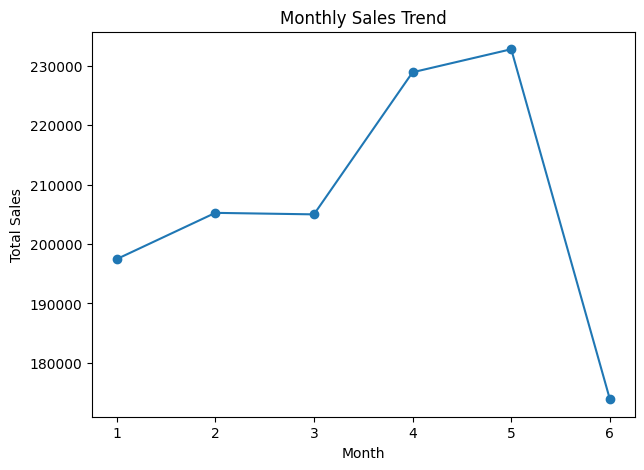

In [49]:
monthly_sales = data.groupby('Month')['Sales'].sum()

plt.figure(figsize=(7,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# Best-Selling-Produts

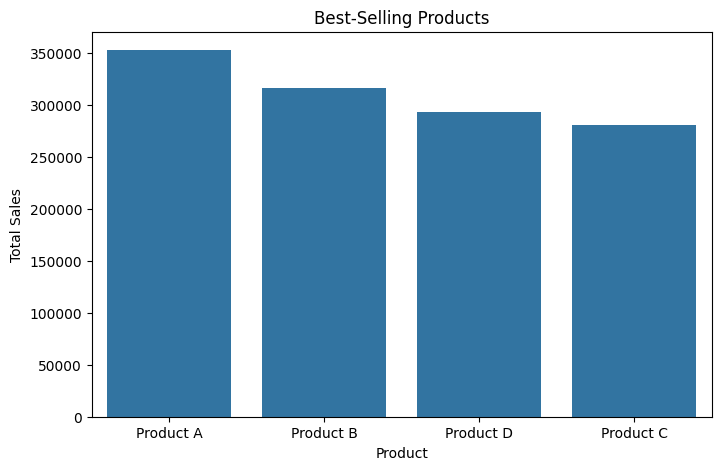

In [52]:
product_sales = data.groupby('Product')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title("Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()

# Sales by Region

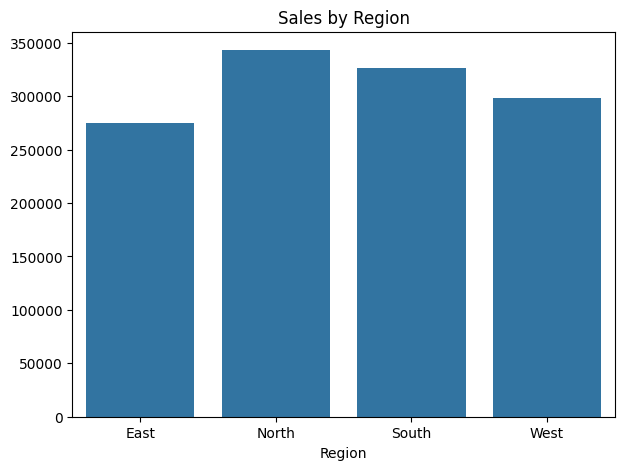

In [32]:
region_sales = data.groupby('Region')['Sales'].sum()

plt.figure(figsize=(7,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.show()

# Categories-wise Sales Distribution

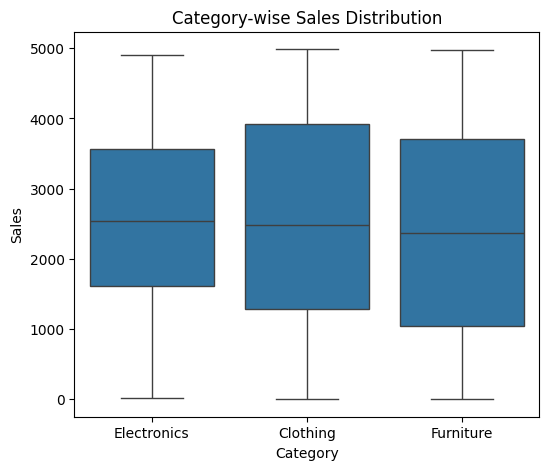

In [50]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Category', y='Sales', data=data)
plt.title("Category-wise Sales Distribution")
plt.show()

# Customer Insight

In [51]:
top_customers = data.groupby('Customer_ID')['Sales'].sum().sort_values(ascending=False).head(5)
top_customers

Customer_ID
1075    33693.977620
1007    25379.539542
1036    24570.198561
1097    24105.640499
1088    23751.056966
Name: Sales, dtype: float64

# Conclusion

- Identified monthly sales trends
- Found top-performing products
- Analyzed region-wise performance